# M5 --- Predictive Modeling in Python
#### Group members:  Zhihong Zhang


## Introduction 
In this practical challenge, I am going to explore two data sets and finish neccessary data cleaning process and modeling. The first data set was built upon a dataset of air quality from UCI repository (https://archive.ics.uci.edu/ml//datasets/Air+quality ).  The first goal of the task is to work on the data preparation. Then after clearing up data, we build some regression models for it. 


 The second data set was built upon a dataset of reading habit data set from Kaggle(https://www.kaggle.com/vipulgote4/reading-habit-dataset ).  The first goal of the task is to work on the data preparation. Then build model based on
 Binary Logistic Regression, Multinomial Logistic Regression, and Ordinal Logistic Regression)

For the steps I will use in this challenge, Exploratory data analysis(EDA) will be launched firstly, and based on the EDA, I will apply Data preparation which includes tiding invalid values, dealing with missing value, adding/removing features for modeling, etc. After Data Prep, the EDA will be relaunched to verify my process. 

After cleaning up the data set, model building will be done. using general supervised machine learning tool to build an predictive model. 


# Part A

##  Exploratory Data Analysis

For part A, the first thing of the task is to load the data set and check the rough view of these attributes. 

In [107]:
import numpy as np
import pandas as pd

# check and read the dataset from github
#found oiut default seperator not working change to ;
df = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/M5/AirQualityUCI.csv', sep = ';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


We notice after we use non-default seperator, there are two column without name and a bunch of null value, we need to check to see whether it is valid. 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


### Attribute Information:

- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
-2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
-4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
-5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
-6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
-7 True hourly averaged NOx concentration in ppb (reference analyzer)
-8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
-9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
-10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
-11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
-12 Temperature in Â°C
-13 Relative Humidity (%)
-14 AH Absolute Humidity



Based on the reference page of UCI repo, we can clearly see that there is no column 15 and 16. After tracing the csv file, we can tell that the null values are contributed two extra semicolon. So we can safely drop these two extra column.  

In [109]:
# drop column
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Just through first some rows of data. We notice there may be some error on mistyping of colon, then we also need to check the null value.

In [110]:
#Check null value
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [111]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


Based on the table and isnull function, we know that there is about 1% of null values. Although it is valid to through away the data, we still need to check how it may affect the contribution of the graph. 

In addition, table also showed bunch of -200, since many of them stands for concentration, it does not make sense in the context. We also need to replace the invalid data. Before we draw some graph, we can replace some symbol to to right number. As we mentioned early, we can fix this colon error firstly showed in many attributes. 

In [112]:
#replace nonsense typo.
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.')
df['T'] = df['T'].str.replace(',','.')
df['RH'] = df['RH'].str.replace(',','.')
df['AH'] = df['AH'].str.replace(',','.')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd474b918d0>,
      dtype=object)

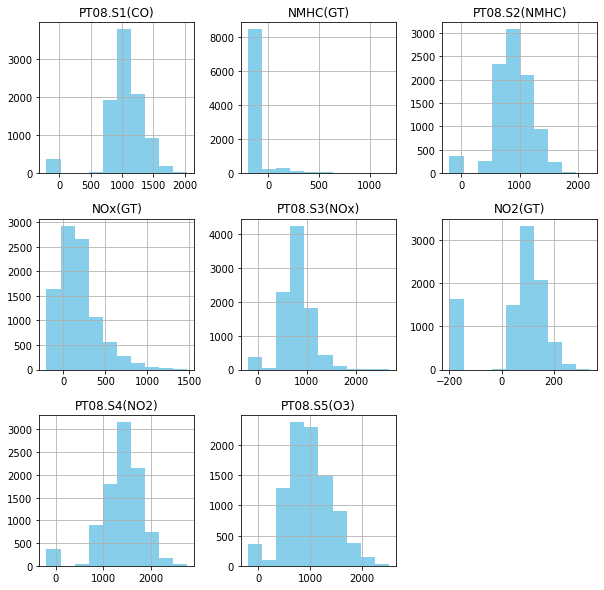

In [113]:
#plot histgram

df.hist(figsize=(10,10), color='skyblue')

Based on histogram, we knew there is a fair a mount of value falls below 0. When we take action on these -200, and it is evitable to change the distribution a bit. In the data prep we will deal with null value and invalid value

## Data Prep

Now we need to drop the null value

In [114]:
df.dropna(inplace=True)
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [115]:
#check value
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [116]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

Firstly we need to change data type into right form

In [117]:
#change form
df[['CO(GT)','C6H6(GT)','T','RH','AH']]= df[['CO(GT)','C6H6(GT)','T','RH','AH']].astype(float) 

Then we will also remove these invalid negative

In [118]:
#define numerical
numerical = ['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)',
             'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

In [119]:
## check how many negative is  
X= df[df[numerical] < 0] 
X.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,1683.0,366.0,8443.0,366.0,366.0,1639.0,366.0,1642.0,366.0,366.0,379.000000,366.0,366.0
mean,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-193.167810,-200.0,-200.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.299804,0.0,0.0
min,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0
25%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0
50%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0
75%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0
max,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-0.100000,-200.0,-200.0


We can see it has a huge amount of negative values 

In [120]:
num = df._get_numeric_data()
num[num < 0] = 0

In [121]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.813081,21.373731,9.688704,902.418296,203.649567,802.813188,93.245592,1399.302661,982.895052,17.602458,47.308400,0.985417
std,1.554264,301.246318,91.103489,7.559785,318.696890,214.993187,299.356129,61.479820,441.458774,438.074058,9.355546,19.474603,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,0.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,0.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Now we need to check how huge the change is

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4746013c8>,
      dtype=object)

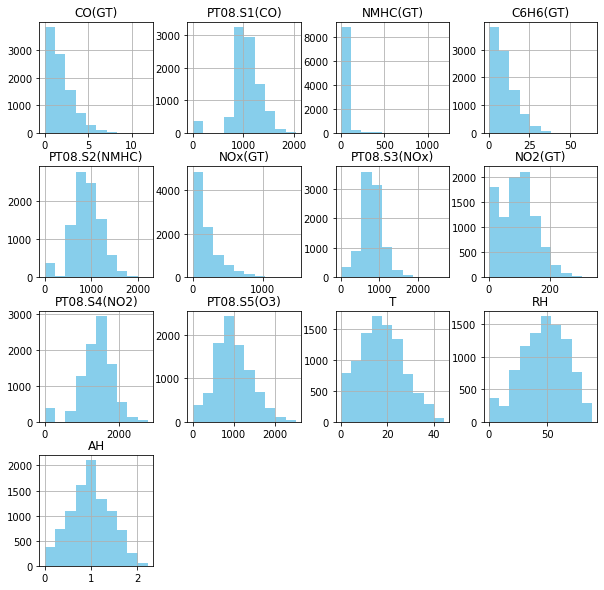

In [122]:
## histogram
df.hist(figsize=(10,10), color='skyblue')

We can tell the distribution does shift, however it changes this invalid negative value and it should make distribution move right a bit to the true mean, and it still improve the data quality since we know irresonable negative drage true mean to the left. 

Now we can launch tool to check numerical attributes before the model building

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

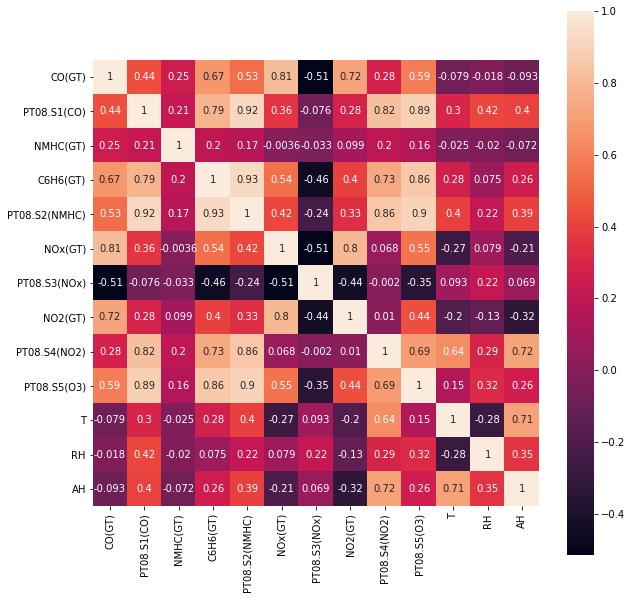

In [124]:
##relationship of numerical data--- Correlation Map
corr = df[numerical].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data=corr, square=True , annot=True, cbar=True,ax=ax)

The heat map provides many insights about collinearity between variables.

Since there are attributes has linear relationship, I choose row 5 which includes PT08.S1(CO),C6H6(GT),NMHC(GT), PT08.S4(NO2),PT08.S5(O3) as common choice.

## Model

### linear regression

In this section, I choose NMHC(GT) to be the target valuable. Since linear regression only require one other variable, here I choose C6H6(GT) to be selected attributes

In [125]:

# set up some library and basic model
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression
# load libraries
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score


#set explanatory variable to X  
#NMHC(GT)
X = df[['PT08.S5(O3)','PT08.S4(NO2)','C6H6(GT)','PT08.S1(CO)']]

#X = df[['C6H6(GT)']]
# give  variable to y
y = df['AH']
# Now split the data into training and testing subsets. 
# We'll set aside 20% of the data for testing purposes;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [126]:
#K choose 5
# Define a linear regression model
model = LinearRegression()

# fit the model using 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

# use np.mean to get the average scores
print("average socre for model1:",np.mean(scores))

[0.72926316 0.70468792 0.71060971 0.68800146 0.70737779]
average socre for model1: 0.7079880063919742


In [127]:
model.fit(X_train, y_train)
#fit test data
y_pred = model.predict(X_test)
print('')
print('###### linear regression Classifier ######')
print('Score : %.4f' % model.score(X_test, y_test))

 


###### linear regression Classifier ######
Score : 0.6902


In [128]:
from sklearn import metrics
# check metrics
#print MAE

def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred), axis=0)

print("MAE is %.4f"%mae(y_test,y_pred))

err = metrics.mean_squared_error(y_pred, y_test)
print("RMSE is %.4f"%err)

r2 = metrics.r2_score(y_pred, y_test)
print("r2 is %.4f"%r2)



MAE is 0.1961
RMSE is 0.0582
r2 is 0.5731


The result is not pleasant based on the crossvalidating score while R2, MAE,MSE value is fine

### xgboost

In [129]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. On the other hand, this method does not reduce the importance of outliers.

XG Boost improves upon standard gradient boosting algorithms.

I set verbose =1 to avoid too many tree building information.

early_stopping_rounds is used to avoid overfitting, I set it to be 15 is for the sake of performance on general metrics and time spending. 

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

new_df = df.AH


new_df = pd.concat([new_df,df[['PT08.S5(O3)','PT08.S4(NO2)','C6H6(GT)','PT08.S1(CO)']]],axis='columns')

label_AH = LabelEncoder()

new_df['AH'] = label_AH.fit_transform(new_df['AH'])


In [132]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(random_state=22)

xgb_reg.fit(X_train,y_train,early_stopping_rounds=15,eval_set=[(X_test, y_test)])
y_pred = xgb_reg.predict(X_test)

# we set verbose =1 toavoid too many tree building information
cv_score = cross_val_score(estimator = xgb_reg, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### XG Boost Classifier ######')
print('Score : %.4f' % xgb_reg.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())

print("MAE is %.4f"%mae(y_test,y_pred))

err = metrics.mean_squared_error(y_pred, y_test)
print("RMSE is %.4f"%err)

r2 = metrics.r2_score(y_pred, y_test)
print("r2 is %.4f"%r2)


[00:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.597689
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:0.550322
[2]	validation_0-rmse:0.508574
[3]	validation_0-rmse:0.471332
[4]	validation_0-rmse:0.43934
[5]	validation_0-rmse:0.409821
[6]	validation_0-rmse:0.384965
[7]	validation_0-rmse:0.362778
[8]	validation_0-rmse:0.344591
[9]	validation_0-rmse:0.328883
[10]	validation_0-rmse:0.314435
[11]	validation_0-rmse:0.302125
[12]	validation_0-rmse:0.292379
[13]	validation_0-rmse:0.283541
[14]	validation_0-rmse:0.276457
[15]	validation_0-rmse:0.270326
[16]	validation_0-rmse:0.265258
[17]	validation_0-rmse:0.260884
[18]	validation_0-rmse:0.257187
[19]	validation_0-rmse:0.254022
[20]	validation_0-rmse:0.251246
[21]	validation_0-rmse:0.248843
[22]	validation_0-rmse:0.246966
[23]	validation_0-rmse:0.245564
[24]	validation_0-rmse:0.244112
[25]	validation_0-r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[00:01:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

###### XG Boost Classifier ######
Score : 0.7448
cv_score : 0.7645
MAE is 0.1690
RMSE is 0.0480
r2 is 0.6471


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


XGboost gives the score of 0.75 on accuracy. And r2 is higher than linear regression.

### Random Forest

The decision tree related algorithm I choose the Random forest based on my previous experience on its relatively decent performance. 

In [133]:

from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=100,  max_depth=16,  random_state=42)
rnd_reg.fit(X_train, y_train)
cv_score = cross_val_score(estimator = rnd_reg, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = rnd_reg.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rnd_reg.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print("MAE is %.4f"%mae(y_test,y_pred))

err = metrics.mean_squared_error(y_pred, y_test)
print("RMSE is %.4f"%err)

r2 = metrics.r2_score(y_pred, y_test)
print("r2 is %.4f"%r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.7875
cv_score : 0.7998
MAE is 0.1400
RMSE is 0.0399
r2 is 0.7418


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.3s finished


The score of Random forest provides a overall best performance on every metric except far longer computing time. 

### SVM

In [134]:
#Import svm model
from sklearn.svm import SVR
svm = SVR(kernel='poly')
svm.fit(X_train, y_train)
cv_score = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = svm.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [135]:
print('')
print('###### SVM ######')
print('Score : %.4f' % svm.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print("MAE is %.4f"%mae(y_test,y_pred))

err = metrics.mean_squared_error(y_pred, y_test)
print("RMSE is %.4f"%err)

r2 = metrics.r2_score(y_pred, y_test)
print("r2 is %.4f"%r2)



###### SVM ######
Score : 0.6542
cv_score : 0.6801
MAE is 0.1972
RMSE is 0.0650
r2 is 0.5608


Based on result SVM give accuray of 0.65

### Summary for part A

Among all 4 models, Random forest gives the highest accuracy and nice R2 value however Random forest has the huge sacrifice on computing expenses and it takes 9.2s to run compared with XGboost. I think XGboost is the best model of 4 for its relatively high score along with the balance on the time. 

Then we switched to secnd dataset

# Part B

##  Exploratory Data Analysis

For part B, the first thing of the task is to load the data set and check the rough view of these attributes. 

In [136]:

# check and read the dataset from github
df2 = pd.read_csv('https://raw.githubusercontent.com/steinszzh/AIProductStudio/master/M5/BigML_Dataset_5f50a62795a9306aa200003e.csv')
df2.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


Just through the first few lines of data, we knew that in this dataset, most variables are categorical except Age, books read during past 12 month. 


Then the code was run to check the overview of the whole data set. And it is clear that there are 2832 rows of data.

In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

Also, we can tell there are some null values across whole dataset. All missing data showed under index 8,9,10,11 column which are closely related to reading habbit for the time. To check clearer on exact quantity of missing value, I then run the following code 

In [138]:
#check null value 
df2.isnull().sum()

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                                0
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
dtype: int64

We can tell that all missing data(which is null) is shown the same number of 390. We believe it can be contributed to the nature of collecting the data. 

Before we take action on these 4 variables, we still need to make some assessment on it. 

we can directly throw away these four missing values and the impact is negligible. 
 we need some more careful checking of the data set. 

This data frame have 2832 rows across 14 variables. 



Since all variables listed are very straightforward and we do not need a special term dictionary for the data set.



We can check

In [139]:
# check column 8
df2['Read any printed books during last 12months?'].unique().tolist()

['Yes', 'No', 'Don’t know', nan]

In [140]:
# check column 9
df2['Read any audiobooks during last 12months?'].unique().tolist()

['No', 'Yes', 'Don’t know', nan]

In [141]:
# check column 10
df2['Read any e-books during last 12months?'].unique().tolist()

['Yes', 'No', 'Don’t know', nan]

In [142]:
# check column 11
df2['Last book you read, you…'].unique().tolist()

['Purchased the book',
 'Borrowed the book from a friend or family member',
 'Borrowed the book from a library',
 'Got the book some other way',
 '8',
 '9',
 nan]

Actually, For the first three column, "Do not know" is equalivalent to nan in this case, we can later merge them together. last variable about last read book status is a bit confusing and it is really hard to track through original source file. 

To begin our data preparation, we will see each of the attributes firstly. In the general sense of the usage of this data set, it is valuable to use this binary data of cancellation. Here I use this attribute to be a starting point. 

In [143]:

#change column
df2['Read any e-books during last 12months?'].replace({'Don’t know': np.nan},inplace = True)
df2['Read any printed books during last 12months?'].replace({'Don’t know': np.nan},inplace = True)
df2['Read any audiobooks during last 12months?'].replace({'Don’t know': np.nan},inplace = True)


In [144]:
# recheck column 10
df2['Read any e-books during last 12months?'].unique().tolist()

['Yes', 'No', nan]

Now we make sure all the values of do not known are changed into null

Here we clarify our purpose of the task is to make a predictive model for a yes/no answer, we really do not want uncertain answer like "Do not know". In addition, it is quite infeasible to predict 4 categorical variable since it will not make sense to use intepolation or other method on null-numerical data. We still need to do some checking before we do our drop work. 

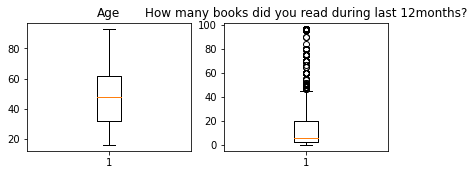

In [146]:

#numerical attribute
numerical2 = ['Age', 'How many books did you read during last 12months?']

# set figure size
fig = plt.figure(figsize=(10, 8))
i = 1
for f in numerical2:
    plt.subplot(3, 3, i)
    plt.boxplot(df2[f])
    plt.title(f)
    i += 1
plt.show()

Based on these information, I had these findings and insights on population and reading facts:

- For the age group, mean is very close to the median, it showed that this set of consecutive numbers are almost equally spaced.

- For the number of reading variable, we can tell that mean is much higher than median, the the variable is quite right-skewed. 





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4745eb940>,
      dtype=object)

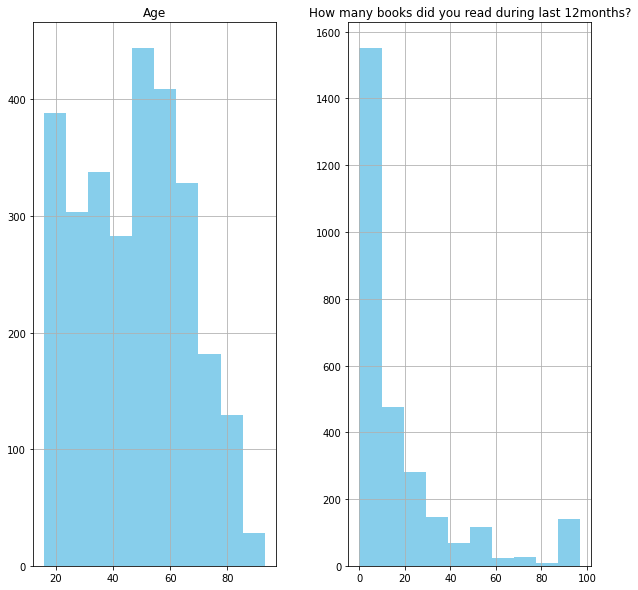

In [147]:
#plot numerical data histogram
df2.hist(figsize=(10,10), color='skyblue')

Then we print remaining categorical data.

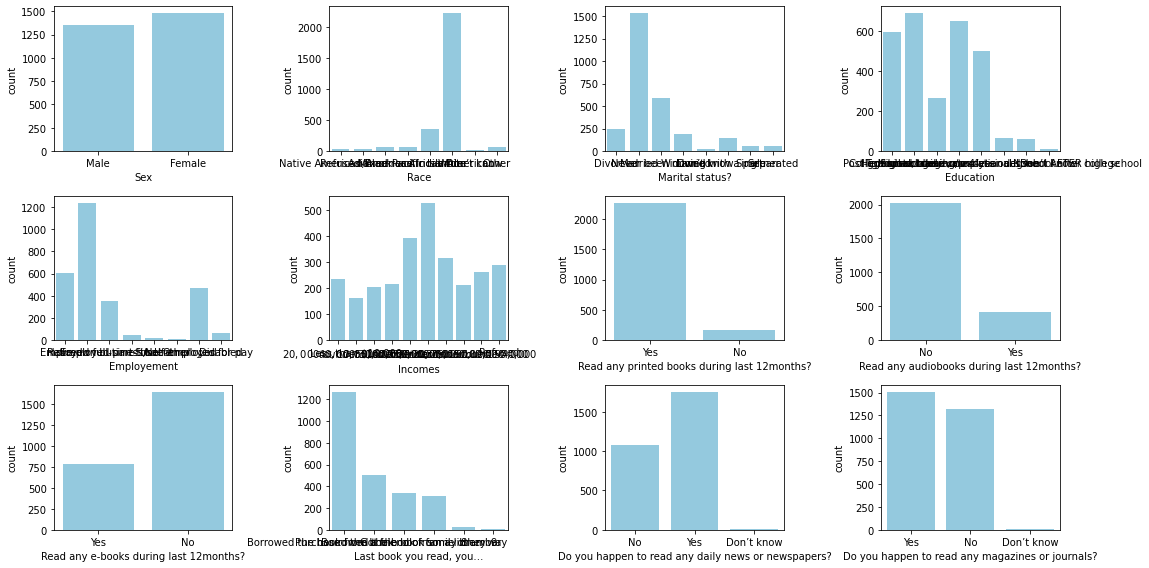

In [148]:
#plot categorical data
fig, axes =plt.subplots(3,4, figsize=(16,8)) #, sharex=True
axes = axes.flatten()


object_bol = df2.dtypes == 'object'
for ax, catplot in zip(axes, df2.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df2, ax=ax, color = 'skyblue')
plt.tight_layout()  
plt.show()

From this count plot, we can see
- gender is roughly equally distributed, there are a bit more female than male
- For the 4 reading habit survey question, do not know accounts for a very small amount. we can also change it into nan as well. 



-

In [149]:
## deal with
#change column
df2['Do you happen to read any daily news or newspapers?'].replace({'Don’t know': np.nan},inplace = True)
df2['Do you happen to read any magazines or journals?'].replace({'Don’t know': np.nan},inplace = True)
       
  

Then we are going to see their relationship.

Then we will run heat map to check the coorelation of attributes.

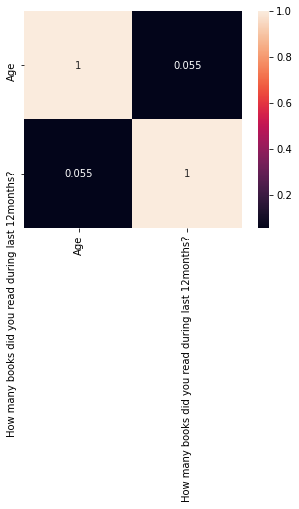

In [151]:
##relationship of numerical data--- Correlation Map
corr = df2[numerical2].corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Although heatmap does not tell much information, but definitely the older does not gurantee more reading considering the year base.

Next section we will deal with missing data.

## Data Preparation & Prepped Data Review


In this section, we will clear up data, moved out some meaningless values if exist.  The task I will perform in this section was shown as follows:

- Dealing with missing data or repetative data. 

- Check whether data is valid or not. Then if not, deal with invalid data.

- Convert yes/no into binary value for later build




### large quantity of missing value
It accounts for a relatively large missing values. However, our goal of the task is to dealing with the prediction on classification, and it will be pointless to leave the value of unidentified. Here we finnally decided to drop values.  

In [152]:
# clear null value
    
 
df2.dropna(subset=['Read any e-books during last 12months?','Read any audiobooks during last 12months?' ,'Do you happen to read any daily news or newspapers?',
                   'Do you happen to read any magazines or journals?',
                  'How many books did you read during last 12months?' ,'Read any printed books during last 12months?'], inplace=True)

df2.isnull().sum()

Age                                                    0
Sex                                                    0
Race                                                   0
Marital status?                                        0
Education                                              0
Employement                                            0
Incomes                                                0
How many books did you read during last 12months?      0
Read any printed books during last 12months?           0
Read any audiobooks during last 12months?              0
Read any e-books during last 12months?                 0
Last book you read, you…                               0
Do you happen to read any daily news or newspapers?    0
Do you happen to read any magazines or journals?       0
dtype: int64

After drop  missing data. We can re-run the histogram to see the new distribution.

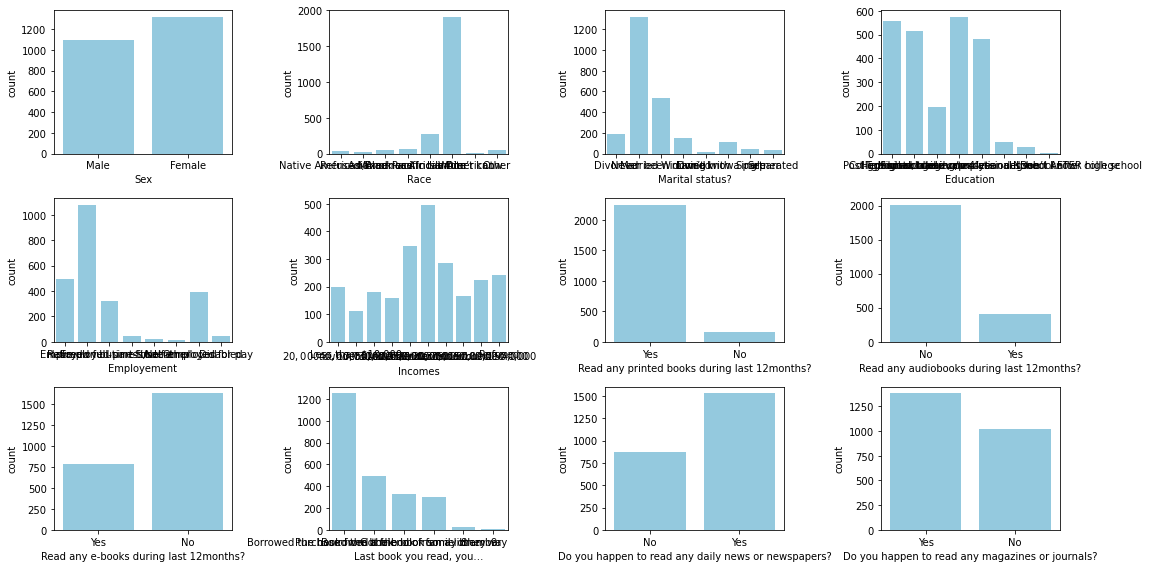

In [153]:
#plot categorical data
fig, axes =plt.subplots(3,4, figsize=(16,8)) #, sharex=True
axes = axes.flatten()


object_bol = df2.dtypes == 'object'
for ax, catplot in zip(axes, df2.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df2, ax=ax, color = 'skyblue')
plt.tight_layout()  
plt.show()

Now we can see compared graph with before. The histogram does not really change much, the reason can be contributed to the fact that these invalid values are negligible compared with the whole data size. 

Based on the data distribution and considered the data value distribution. Do you happen to read any magazine or journals may be a better binary value for prediction. 

### Check duplicates and invalid values of the data set



In [154]:
df2.describe()


,Age,How many books did you read during last 12months?
count,2407.000000,2407.000000
mean,46.535521,19.352306
std,18.464573,24.407333
min,16.000000,1.000000
25%,31.000000,4.000000
50%,47.000000,10.000000
75%,61.000000,24.000000
max,93.000000,97.000000


After taking out multiple rows of data, it does change a better on the numerical attribute, and we can tell mean is closer to median now. However, we can not simply find the invalid value when we check histogram or tables. 

Before we build the model, we need to convert the binary value.

  

In [157]:
## convert value
df2['Do you happen to read any daily news or newspapers?'].replace({'Yes': 1,'No':0},inplace = True)
df2['Do you happen to read any magazines or journals?'].replace({'Yes': 1,'No':0},inplace = True)
df2['Read any e-books during last 12months?'].replace({'Yes': 1,'No':0},inplace = True)
df2['Read any printed books during last 12months?'].replace({'Yes': 1,'No':0},inplace = True)
df2['Read any audiobooks during last 12months?'].replace({'Yes': 1,'No':0},inplace = True)

In [158]:
# check work

df2['Do you happen to read any magazines or journals?'].unique()

array([1, 0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd47330a0b8>,
      dtype=object)

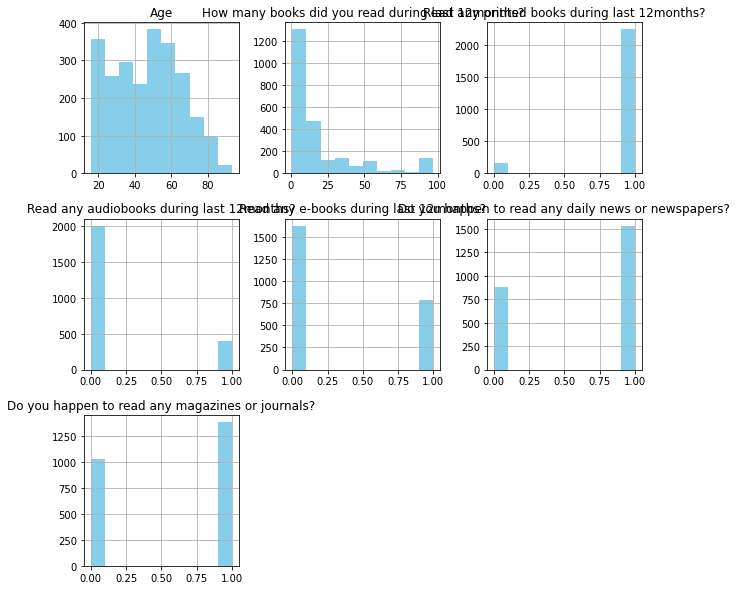

In [159]:
#plot numerical data histogram
df2.hist(figsize=(10,10), color='skyblue')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


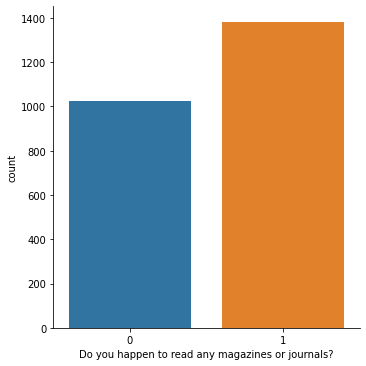

In [165]:
sns.factorplot(x='Do you happen to read any magazines or journals?', data=df2 , kind='count' )#,aspect=2.5

If we want to know how many people read magazine, since it is a bit imbalanced, it will give a null-error rate around 40%.

## Model

Based on the requirement, we need to use Binary Logistic Regression,
Multinomial Logistic Regression, and Ordinal Logistic Regression to build the model. 

### Binary Logistic Regression

SInce binay search need to take care of imbalanced nature of data

In [ ]:
df2[''].replace({'Yes': 1,'No':0},inplace = True)
df2[''].replace({'Yes': 1,'No':0},inplace = True)
df2[''].replace({'Yes': 1,'No':0},inplace = True)
df2[''].replace({'Yes': 1,'No':0},inplace = True)
df2[''].replace({'Yes': 1,'No':0},inplace = True)

In [167]:
X = df2[['Read any audiobooks during last 12months?','Read any printed books during last 12months?',
        'Age','Read any e-books during last 12months?','Do you happen to read any daily news or newspapers?']]
y = df2['Do you happen to read any magazines or journals?']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Then we can build the model

In [181]:

from sklearn.linear_model import LogisticRegression
#apply smote
from imblearn.over_sampling import SMOTE

#Start with default setting for logistic regression

model = LogisticRegression()
#train the algorithm
model.fit(X_train, y_train)
#5 fold validation
cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(model.score(X_test, y_test))


###### Logistic Regression ######
Score : 0.6141
cv_score : 0.6156
Accuracy: 61.41078838174274
Precision: 61.96033855132181
Recall: 61.41078838174274
F1-score: 59.103679484274686


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [173]:
# y is actual, then predict value
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred )
#get area value
print("AUC value is %.4f"% metrics.auc(fpr, tpr))

AUC value is 0.5940


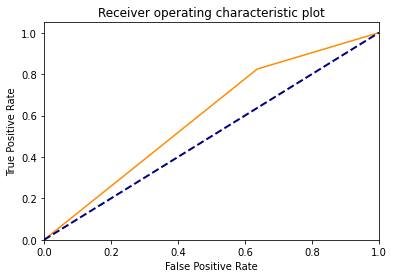

In [172]:
# olot roc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#define line
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic plot')
plt.show()


### Multinomial Logistic Regression

Similarly, we then build multinomial logistic regression,

In [180]:
model = LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X_train, y_train)
#5 fold validation
cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(model.score(X_test, y_test))



###### Logistic Regression ######
Score : 0.6141
cv_score : 0.6161
Accuracy: 61.41078838174274
Precision: 61.96033855132181
Recall: 61.41078838174274
F1-score: 59.103679484274686


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [178]:
# y is actual, then predict value
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred )
#get area value
print("AUC value is %.4f"% metrics.auc(fpr, tpr))

AUC value is 0.5940


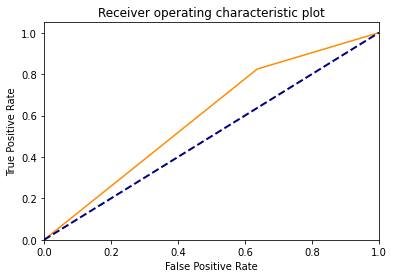

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#define line
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic plot')
plt.show()

In our example, actually, there is no difference between this two logistic models since I alreay avoid more than two outcome variables. 

### Ordinal Logistic Regression

Now we start ordinal logistic regression, here I use mord package to do this regression

In [185]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-cp36-none-any.whl size=6009 sha256=871ac2c24541f696c61076143030fc4656bd487d1662277aef4af41609e70da8
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord


In [186]:
import mord

In [187]:
  #change parameter to fit the condition
model = mord.OrdinalRidge(alpha=0.001, 
 							fit_intercept=True, 
						 	normalize=False, 
 							copy_X=True, 
 							max_iter=None, 
 							tol=0.001, 
 							solver='auto').fit(X_train, y_train) 

#5 fold validation
cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(model.score(X_test, y_test))


###### Logistic Regression ######
Score : -0.3859
cv_score : -0.3881
Accuracy: 61.41078838174274
Precision: 61.96033855132181
Recall: 61.41078838174274
F1-score: 59.103679484274686


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [188]:
# y is actual, then predict value
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred )
#get area value
print("AUC value is %.4f"% metrics.auc(fpr, tpr))

AUC value is 0.5940


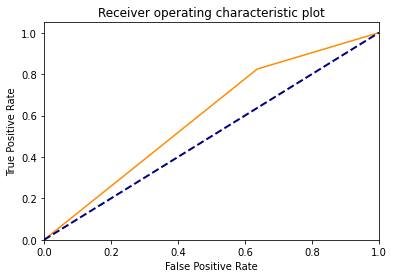

In [189]:
#define line
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic plot')
plt.show()

However, only difference is the accuracy in ordinal logistic regression. This give an abnormal values. Based on my evaluation of all three models, I believe the binary logistic model and multinomial logistic model are equally good if consider these parameters. 

# Part C: Clustering

Here I decided to use KNN to do this clustering work. Since the Part A data are full of numerical value which is not quite good for this clustering work if I do not implement more feature engineering. I start with PartB data

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
#KNN 
X = df2[['Read any audiobooks during last 12months?','Read any printed books during last 12months?',
        'Age','Read any e-books during last 12months?','Do you happen to read any daily news or newspapers?']]
y = df2['Do you happen to read any magazines or journals?']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2, random_state=66)



# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=113)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)
cv_score = cross_val_score(estimator = knn, X = X_train1, y = y_train1, cv = 5,verbose = 1)
y_pred = knn.predict(X_test1)
print('')
print('###### KNN ######')
print('Score : %.4f' % knn.score(X_test1, y_test1))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test1,y_pred))
print('Precision:', 100* precision_score(y_test1,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test1,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test1,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test1,y_pred))
Precision.append(100* precision_score(y_test1,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test1,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test1,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(knn.score(X_test1, y_test1))


###### KNN ######
Score : 0.5602
cv_score : 0.5647
Accuracy: 56.016597510373444
Precision: 55.65957220534905
Recall: 56.016597510373444
F1-score: 55.67508387136747


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Since I used weighted KNN to give a fair comparision. In my opinion, the accuracy is quite low and it is only better than random guess in a balanced data. However, if in our original imbalanced data, it will perform even worse than random guess. The low value can be contributed to wrong k value selection and too simple feature extraction. Extra careful tuning can provide a better result. 

## Conclusion
Overall, it is a nice exploration for the common algorithm in dealing with classification and regression. The work can be improved by careful tuning and feature selection. Due to the nature of the size of both dataset, deep learning method will not work well in this particular work. 

## References

1. https://usafacts.org/data/topics/economy/jobs-and-income/jobs-and-wages/median-annual-wage/?utm_source=bing&utm_medium=cpc&utm_campaign=ND-Jobs&msclkid=97d91de8ccab1c4a099c426482686aed
2018 annual income



2. imbalanced data dealing https://datascience.stackexchange.com/questions/1107/quick-guide-into-training-highly-imbalanced-data-sets#:~:text=Gradient%20boosting%20is%20a%20principled,based%20on%20incorrectly%20classified%20examples.

3. https://medium.com/m/signin?actionUrl=%2F_%2Fbookmark%2Fp%2Fc4eb2a9954ad&operation=register&redirect=https%3A%2F%2Ftowardsdatascience.com%2Fdata-imputation-to-improve-model-performance

4. https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/

5. An overview and evaluation of recent machine learning from assigned reading. 